# MLNS ASSIGNEMENT - MISSING LINK PREDICTION

## I - INITIALISING ENVIRONMENT

In [1]:
import numpy as np
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Nombre de nœuds : 3597
Nombre de liens : 10496
Degré moyen : 5.835974423130386


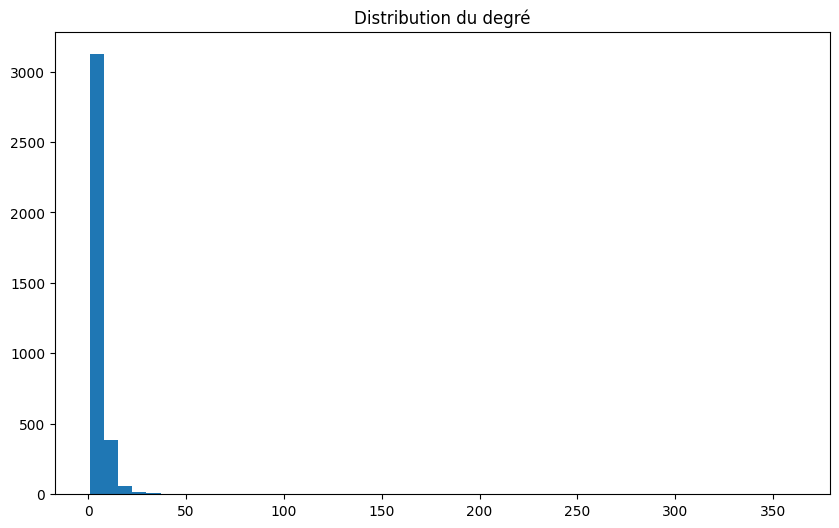

Les 5 nœuds avec la plus grande centralité : [(3809, 0.10038932146829811), (6416, 0.014738598442714126), (7426, 0.01167964404894327), (7174, 0.010845383759733037), (7272, 0.010845383759733037)]
Densité du réseau : 0.001622907236688094


In [4]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import networkx as nx

# 2. Charger les données
node_info = pd.read_csv("../data/node_information.csv", header=None)
test_set = pd.read_csv("../data/test.txt", sep=" ", header=None, names=['source', 'target'])
train_set = pd.read_csv("../data/train.txt", sep=" ", header=None, names=['source', 'target', 'label'])


# Créer un graphe à partir du train_set
G = nx.from_pandas_edgelist(train_set, 'source', 'target', 'label')

# Nombre de nœuds
print("Nombre de nœuds :", G.number_of_nodes())

# Nombre de liens
print("Nombre de liens :", G.number_of_edges())

# Degré moyen
## Dans un réseau, le degré d'un nœud est le nombre de liens qu'il a avec d'autres nœuds.
degrees = [G.degree(n) for n in G.nodes()]
print("Degré moyen :", np.mean(degrees))

# Distribution du degré
plt.figure(figsize=(10,6))
plt.title("Distribution du degré")
plt.hist(degrees, bins=50)
plt.show()

# Centralité
## La centralité d'un nœud mesure son importance relative au sein du réseau. 
##Il existe plusieurs mesures de centralité, dont la centralité de degré (nombre de liens vers un nœud), 
##la centralité de proximité (inverse de la somme des distances à tous les autres nœuds), et 
##la centralité d'intermédiarité (nombre de fois qu'un nœud agit comme un pont le long du chemin le plus court entre deux autres nœuds).
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Les 5 nœuds avec la plus grande centralité :", sorted_centrality[:5])

# Densité du réseau
## La densité d'un réseau est le rapport entre le nombre de liens réels dans le réseau et le nombre de liens possibles.
print("Densité du réseau :", nx.density(G))

In [9]:
# Importer les bibliothèques nécessaires
from pyvis.network import Network
import networkx as nx

# Créer un graphe à partir du train_set
G = nx.from_pandas_edgelist(train_set, 'source', 'target', 'label')

# Créer une visualisation interactive
net = Network(notebook=True)
net.from_nx(G)
net.show("graph.html")

graph.html
